In [2]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
    filter_topic_modeling_key_terms,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [27]:
kjv_path = "/Users/zebo/Documents/Freelancing/upwork/Peter_J_Worth_Jr/NLP/hierarchical_clustering/data/t_kjv.csv"
kjv_bible_df = preprocess_kjv(
    path_to_kjv=kjv_path,
)

# Get book column unique values.
all_books = kjv_bible_df["book"].unique()

# Specify the number of top words to use.
n = 70

books = []
for book in all_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    book_text = ""
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        book_text += " ".join(chapter_df["text"].values)
    books.append(" ".join(chapter_df["text"].values))

titles = all_books
chapters = books

["And Joseph fell upon his father's face, and wept upon him, and kissed him. And Joseph commanded his servants the physicians to embalm his father: and the physicians embalmed Israel. And forty days were fulfilled for him; for so are fulfilled the days of those which are embalmed: and the Egyptians mourned for him threescore and ten days. And when the days of his mourning were past, Joseph spake unto the house of Pharaoh, saying, If now I have found grace in your eyes, speak, I pray you, in the ears of Pharaoh, saying, My father made me swear, saying, Lo, I die: in my grave which I have digged for me in the land of Canaan, there shalt thou bury me. Now therefore let me go up, I pray thee, and bury my father, and I will come again. And Pharaoh said, Go up, and bury thy father, according as he made thee swear. And Joseph went up to bury his father: and with him went up all the servants of Pharaoh, the elders of his house, and all the elders of the land of Egypt, And all the house of Jose

## Perform topic modeling

In [19]:
NUM_TOPICS = 6
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters,
    num_topics=NUM_TOPICS,
    n_key_terms=20,
)

CLUSTER #1
Cluster Chapters: [1, 2, 18, 19, 20, 21, 26, 27, 28, 30, 31, 32, 33, 34, 35, 58, 65]
Key Features: ['shall', 'thy', 'thou', 'lord', 'thee', 'praise', 'upon', 'unto', 'let', 'shalt', 'ye', 'god', 'day', 'thine', 'estimation', 'thou shalt', 'earth', 'man', 'fruit', 'tabernacle']
CLUSTER #2
Cluster Chapters: [0, 3, 4, 5, 6, 7, 8, 9, 12, 14, 17, 24, 25, 61]
Key Features: ['unto', 'israel', 'lord', 'said', 'inheritance', 'sons', 'god', 'thousand', 'joseph', 'land', 'thee', 'children', 'tribe', 'job', 'david', 'son', 'side', 'people', 'saul', 'us']
CLUSTER #3
Cluster Chapters: [22, 29, 36, 37, 38, 42]
Key Features: ['shall', 'saith', 'saith lord', 'lord', 'hosts', 'lord hosts', 'day', 'ye', 'saith unto', 'unto', 'come', 'earth', 'shall come', 'upon', 'peter', 'jerusalem', 'forth', 'simon', 'jesus', 'nations']
CLUSTER #4
Cluster Chapters: [39, 40, 41, 43, 60]
Key Features: ['unto', 'sepulchre', 'came', 'said', 'ye', 'shall', 'things', 'said unto', 'disciples', 'jesus', 'risen', 'ma

## Run the workflow on one cluster

Chosen chapters  [39, 40, 41, 43, 60]
Removing the following terms:  ['came', 'said', 'ye', 'said unto', 'risen', 'went', 'us', 'believed', 'see', 'saying']
Removing  disciples  from current_level_words, it will be a child of  jesus
Removing  galilee  from current_level_words, it will be a child of  jesus
Removing  things  from current_level_words, it will be a child of  jesus
Removing  day  from current_level_words, it will be a child of  sepulchre

 Current level:  0
All children:  ['bethlehem', 'judaea', 'days', 'herod', 'wilderness', 'him', 'time', 'brethren', 'galilee', 'sayings', 'hand', 'capernaum', 'it', 'centurion', 'house', 'great multitudes', 'thoughts', 'thence', 'meat', 'that', 'them', 'minstrels', 'people', 'cities', 'villages', 'end', 'sabbath day', 'corn', 'multitude', 'parables', 'great multitude', 'disciples', 'other side', 'fourth watch', 'night', 'coasts', 'tyre', 'her', 'woman', 'sea', 'heed', 'beware', 'caesarea philippi', 'peter', 'james', 'high mountain', 'arise

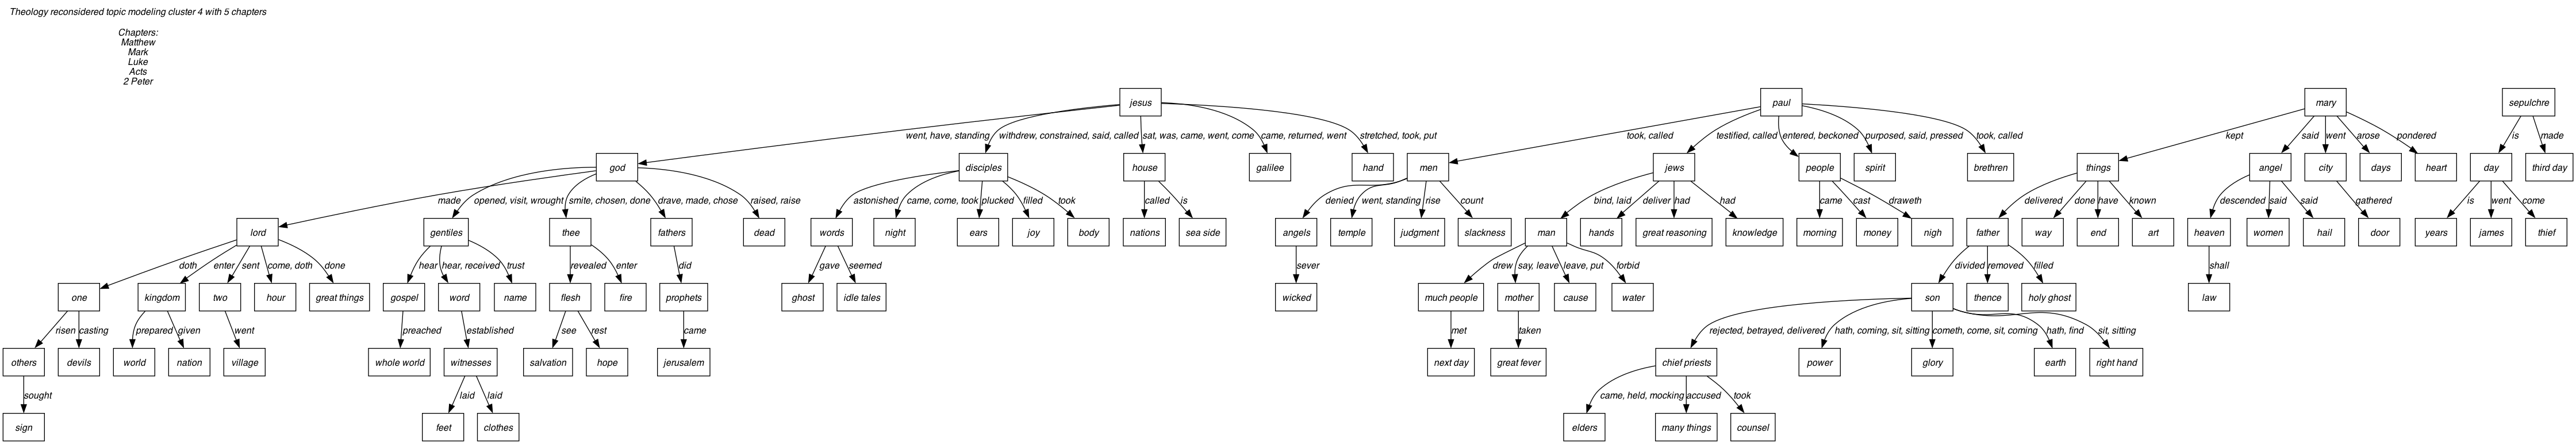

In [31]:
# Specify the chapters used in the analysis.
chosen_cluster = 4
use_key_terms = True
chosen_hierarchy_depth = 5
chosen_hierarchy_max_width = 5
only_compounds = True

chosen_chapters = clusters[chosen_cluster]

chapter_titles = [titles[i] for i in chosen_chapters]
key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])

tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=True,
)

if use_key_terms:
    current_level_words = filter_topic_modeling_key_terms(
        key_terms=key_terms_per_cluster[chosen_cluster],
        tf_idf_word_types=tf_idf_pre_filtering,
        verbose=True,
    )
else:
    raise NotImplementedError("Not implemented yet.")
    # Specify the number of top words to use.
    n = max(50, len(chosen_chapters) * 5)
    current_level_words = tf_idf_pre_filtering.head(n)["word"].values


# Create a list of all verses of the chosen books.
all_verses = []
for book in chosen_chapters:
    book_df = kjv_bible_df[kjv_bible_df["book"] == titles[book]]
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        for verse in chapter_df["text"].values:
            all_verses.append(verse)

used_words = set()
all_ordered_directed_relations = []
all_relations_to_verbs = {}

# First, let's see relations between the key terms.
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=current_level_words,
    all_verses=all_verses,
    verbose=False,
    only_compounds=only_compounds,
)

# Order the directed relations.
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="product",
    include_ordering_wrt_occurences=True,
    verbose=False,
)


for relation in ordered_directed_relations:
    if relation[0] in current_level_words and relation[1] in current_level_words:
        current_level_words.remove(relation[1])
        print(
            "Removing ",
            relation[1],
            " from current_level_words, it will be a child of ",
            relation[0],
        )


for current_level in range(chosen_hierarchy_depth):
    print("\n Current level: ", current_level)

    if len(current_level_words) == 0:
        break

    # Now lets see all relations that come out of the key terms.
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=current_level_words,
        all_verses=all_verses,
        verbose=False,
        get_all_one_directional="lower",
        only_compounds=only_compounds,
    )
    print("All children: ", [relation[1] for relation in directed_relations])

    # Filter out the relations whose children is not in tf_idf_pre_filtering
    # and it has not been used already, but print them out first.
    children_to_remove_1 = [
        key[1]
        for key, _ in directed_relations.items()
        if key[1] not in tf_idf_pre_filtering["word"].values
    ]
    # Keep the bigrams and trigrams which are not in tf_idf_pre_filtering but
    # all of their words are in tf_idf_pre_filtering.
    children_to_remove_1 = [
        child
        for child in children_to_remove_1
        if not (
            len(child.split(" ")) > 1
            and all(
                word in tf_idf_pre_filtering["word"].values for word in child.split(" ")
            )
        )
    ]
    print("Children to remove due to tf_idf_pre_filtering: ", children_to_remove_1)

    children_to_remove_2 = [
        key[1] for key, _ in directed_relations.items() if key[1] in used_words
    ]
    print("Children to remove due to used words: ", children_to_remove_2)

    directed_relations = {
        key: value
        for key, value in directed_relations.items()
        if key[1] not in children_to_remove_1 and key[1] not in children_to_remove_2
    }

    # Order the directed relations.
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )

    # Constrain at most chosen_hierarchy_max_width relations per key term.
    if chosen_hierarchy_max_width is not None:
        counter = {}
        relations_to_remove = []
        for idx, relation in enumerate(ordered_directed_relations):
            if relation[0] in counter:
                counter[relation[0]] += 1
            else:
                counter[relation[0]] = 1
            if counter[relation[0]] > 5:
                relations_to_remove.append(relation)
        for relation in relations_to_remove:
            ordered_directed_relations.remove(relation)

    # Add parents and children to the used words.
    used_words.update([relation[0] for relation in ordered_directed_relations])
    used_words.update([relation[1] for relation in ordered_directed_relations])

    # Add the relations to the list of all relations.
    all_ordered_directed_relations.extend(ordered_directed_relations)
    all_relations_to_verbs.update(relations_to_verbs)

    # Set the current level words to the words that are the children of the current level words.
    current_level_words = [relation[1] for relation in ordered_directed_relations]
    print("Current level words ", current_level_words)


# Construct the ontology hierarchy.
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=all_ordered_directed_relations,
)

# Draw the ontology hierarchy.
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=all_relations_to_verbs,
    title="Theology reconsidered topic modeling cluster "
    + str(chosen_cluster)
    + " with "
    + str(len(chosen_chapters))
    + " chapters",
    topic_modelling_chapters=chapter_titles,
)

In [9]:
tf_idf_pre_filtering[tf_idf_pre_filtering["word"] == "classical chinese"]

,word,word_type,tc,tf,dc,idf,tf_idf
226,classical chinese,"{'NNPS': 7, 'NNP': 102, 'JJ': 226, 'GPE': 280,...",19,0.000474,7,0.0,0.0


In [9]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[525])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

## Run for all clusters of the text

Removing the following terms:  ['also', 'well', 'one', 'first', 'writing', 'written', 'see', 'much', 'sumer', 'even', 'perhaps', 'sumer babylonian', 'find']


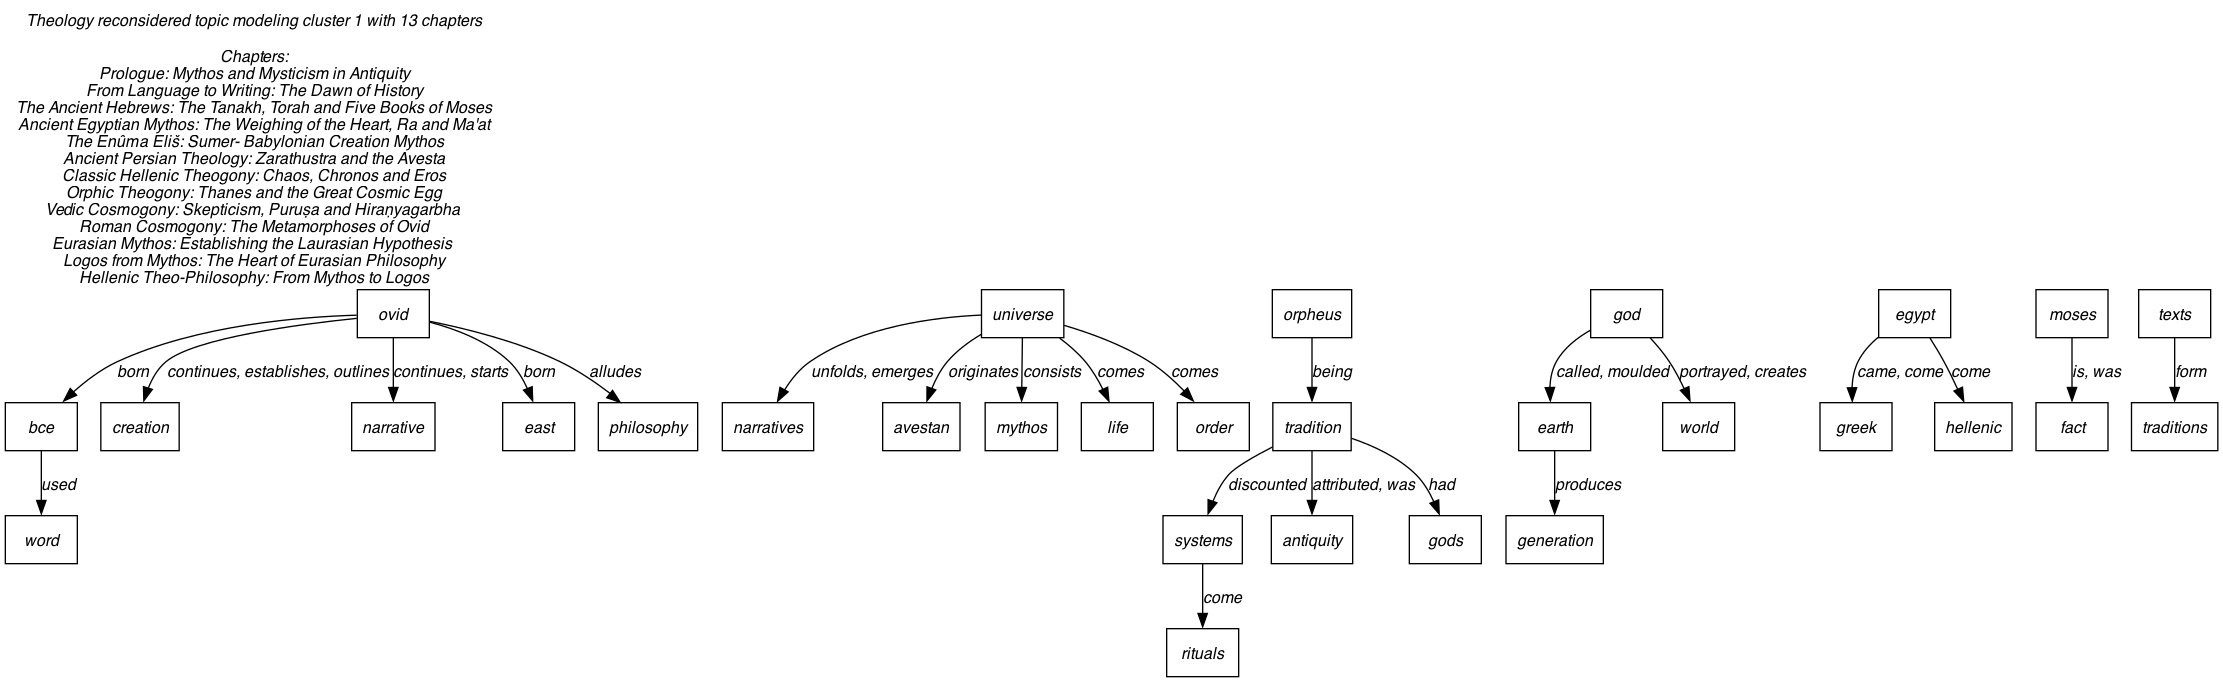

Removing the following terms:  ['subject object', 'metaphysics quality', 'static quality', 'object metaphysics', 'dynamic quality', 'one', 'even', 'subjectobject', 'motorcycle maintenance', 'subjects objects', 'aspect quality', 'subjectobject metaphysics', 'zen art', 'art motorcycle']


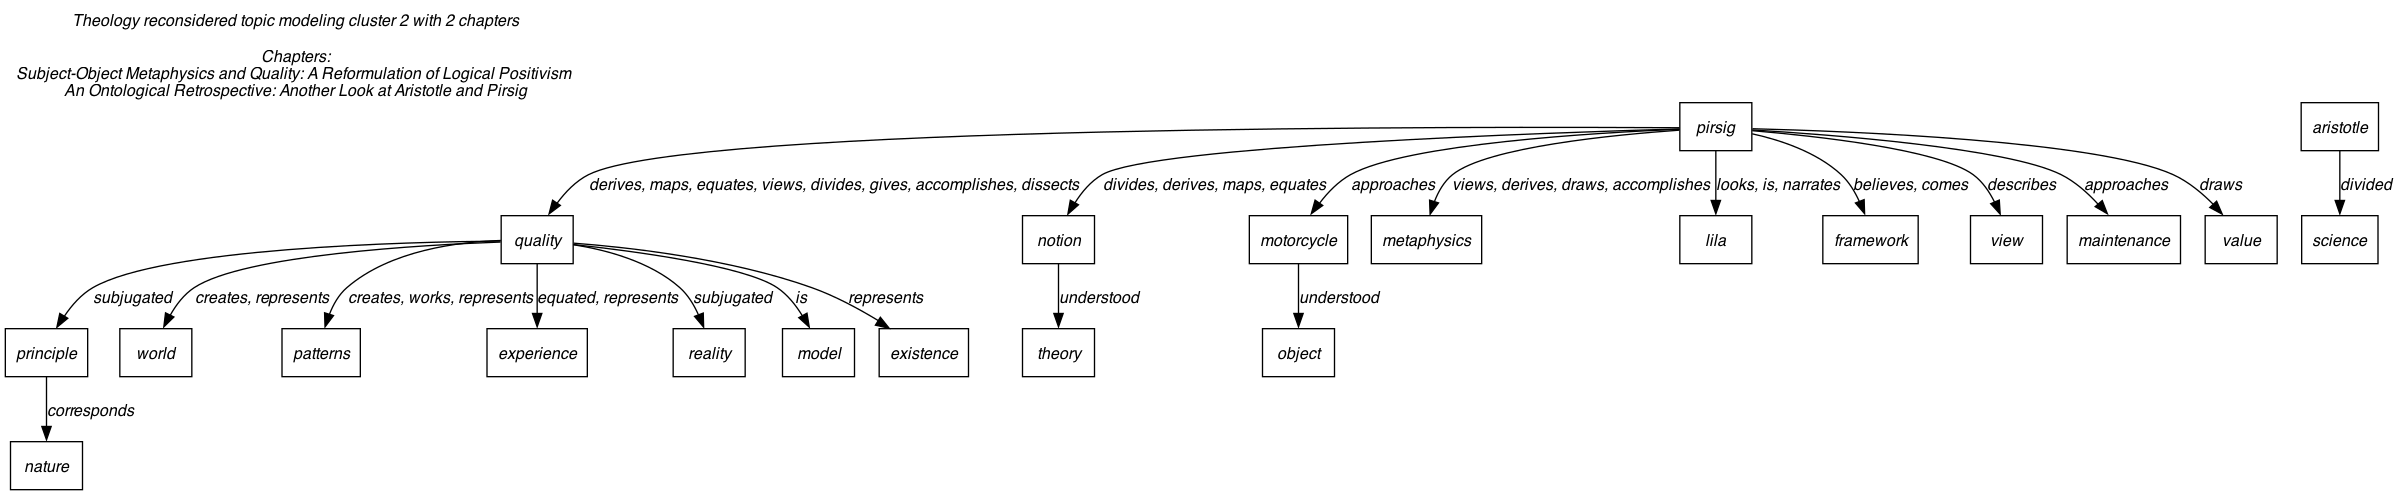

Removing the following terms:  ['suffering', 'one', 'also', 'well', 'first', 'works', 'form knowledge', 'said', 'know', 'two']


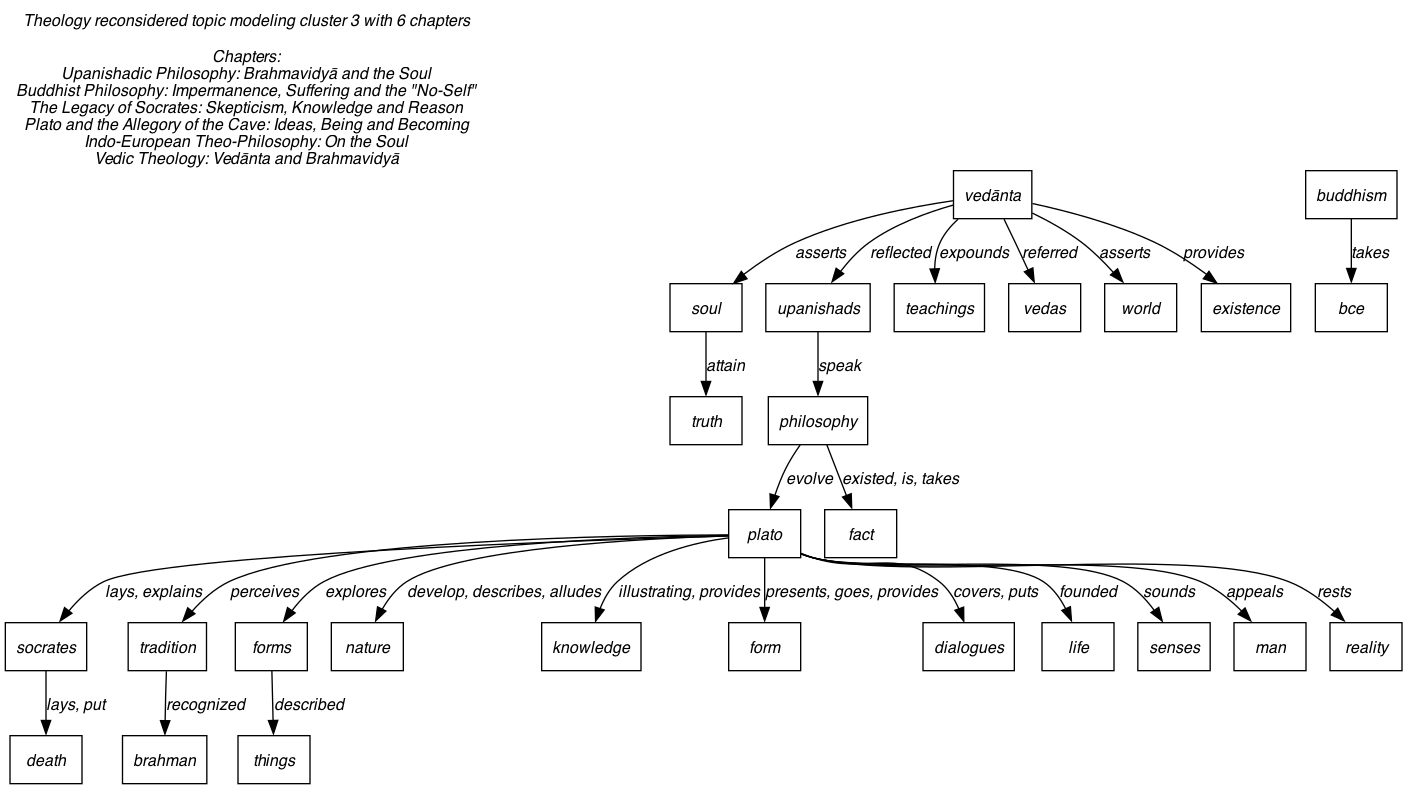

Removing the following terms:  ['well', 'theo', 'theo philosophical', 'also', 'one', 'find', 'even', 'first', 'much', 'theophilosophical', 'indo', 'throughout eurasia']


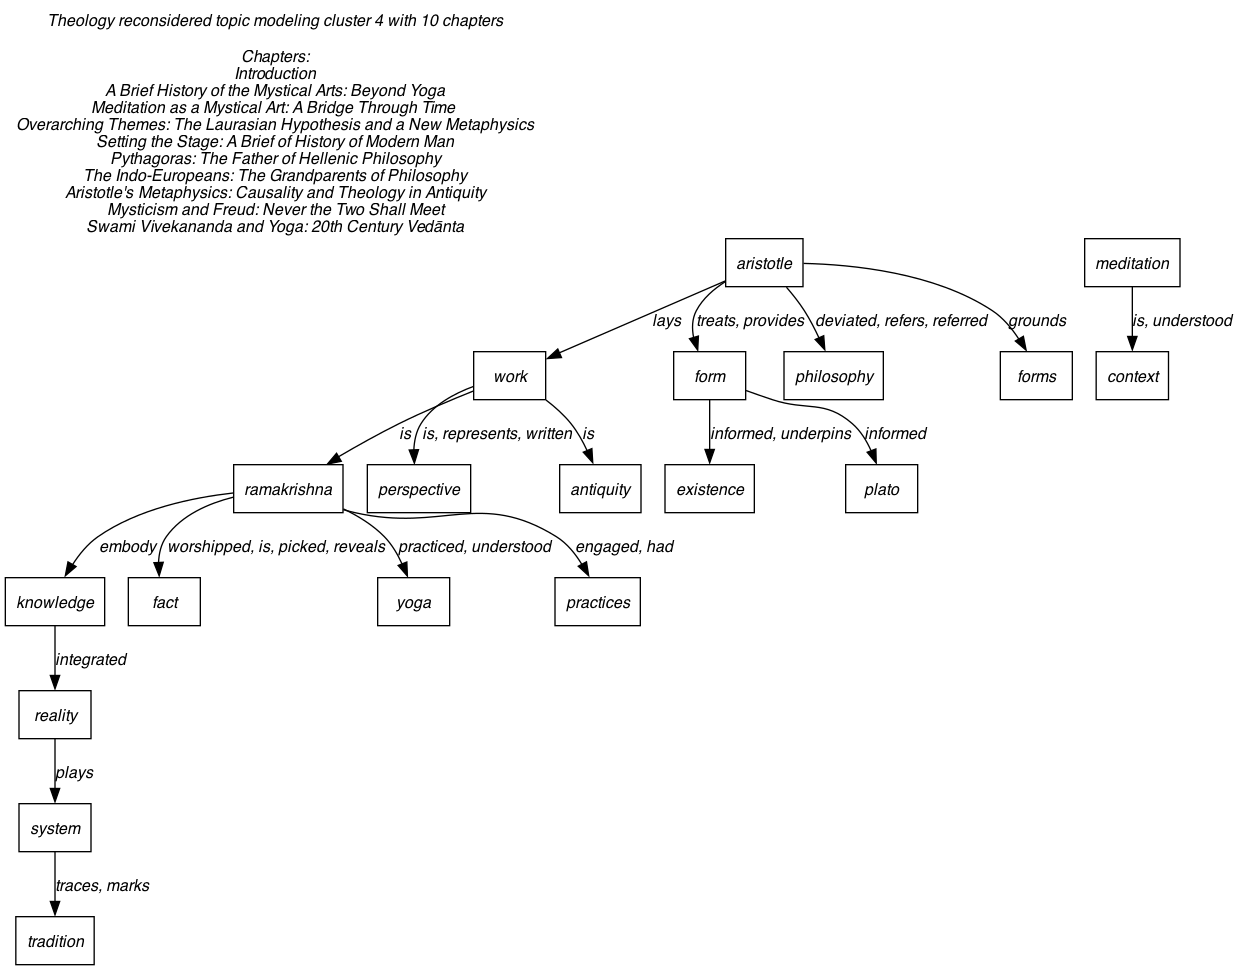

Removing the following terms:  ['quantum theory', 'quantum mechanics', 'classical mechanics', 'one', 'well', 'even', 'defined', 'underlying']


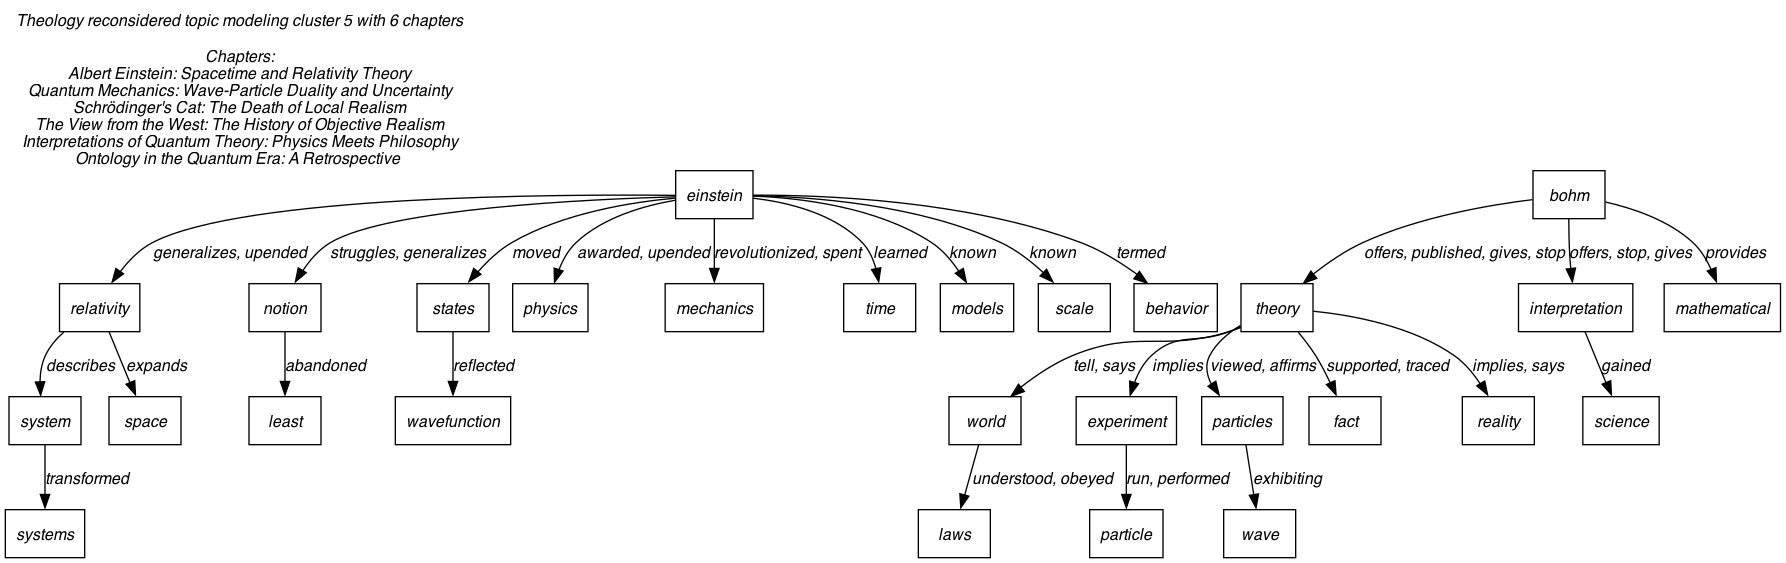

Removing the following terms:  ['one', 'well', 'also', 'metaphysics awareness']


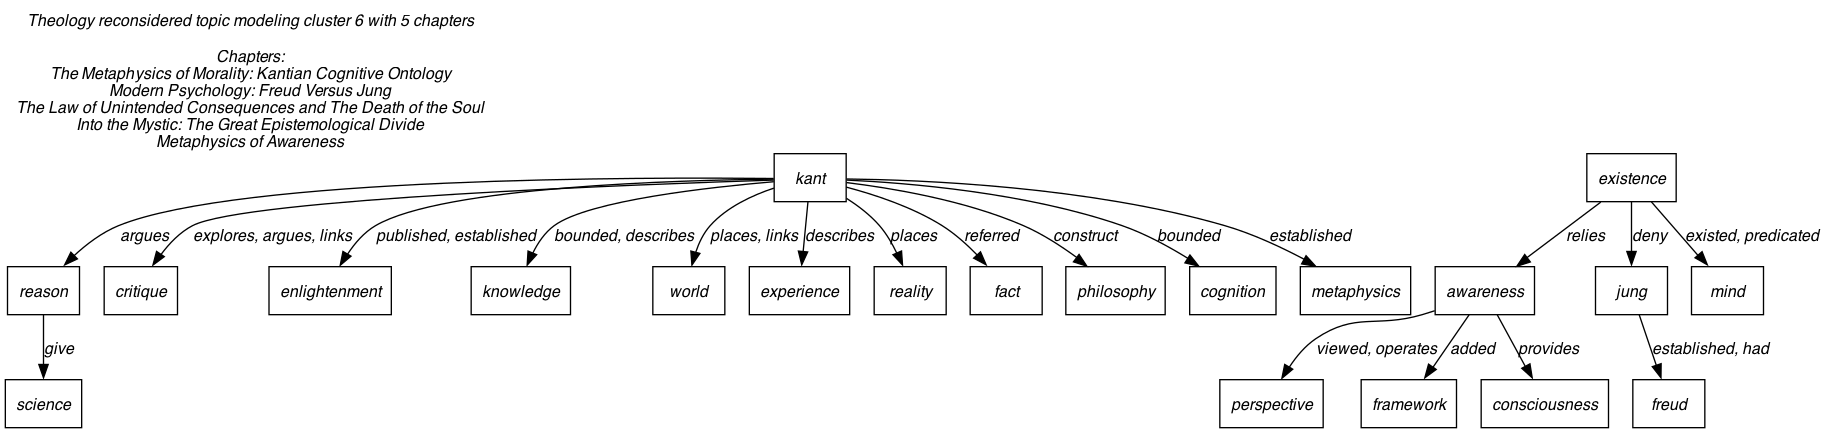

Removing the following terms:  ['one', 'ancient chinese', 'also', 'heaven earth', 'well', 'first', 'dàodé jīng', 'zhou dynasty', 'chinese antiquity', 'writing', 'see', 'form', 'chinese philosophical', 'two', 'even', 'written', 'eight']


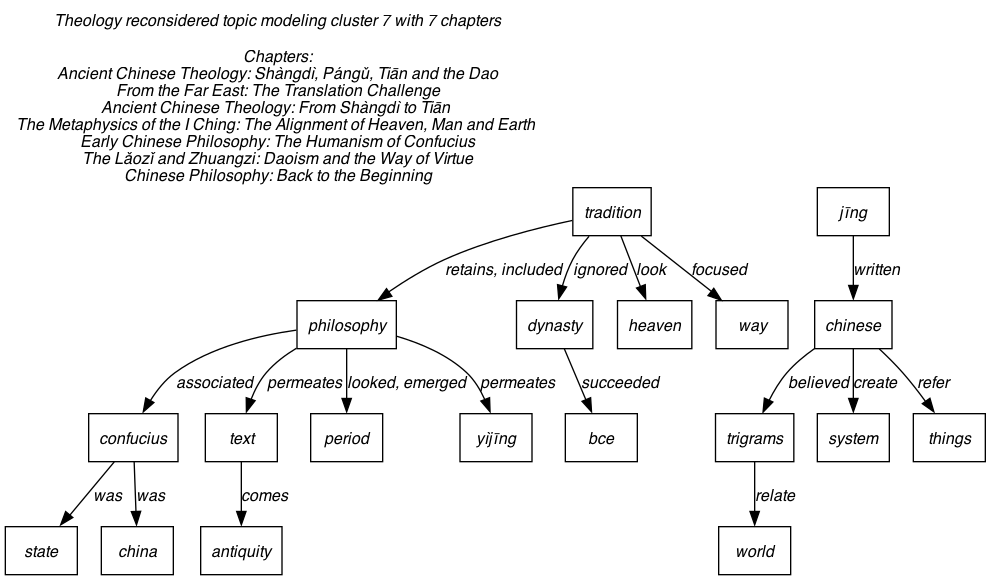

Removing the following terms:  ['al', 'one', 'also', 'well', 'first', 'works', 'muammad', 'salvation', 'old testament', 'qurn']


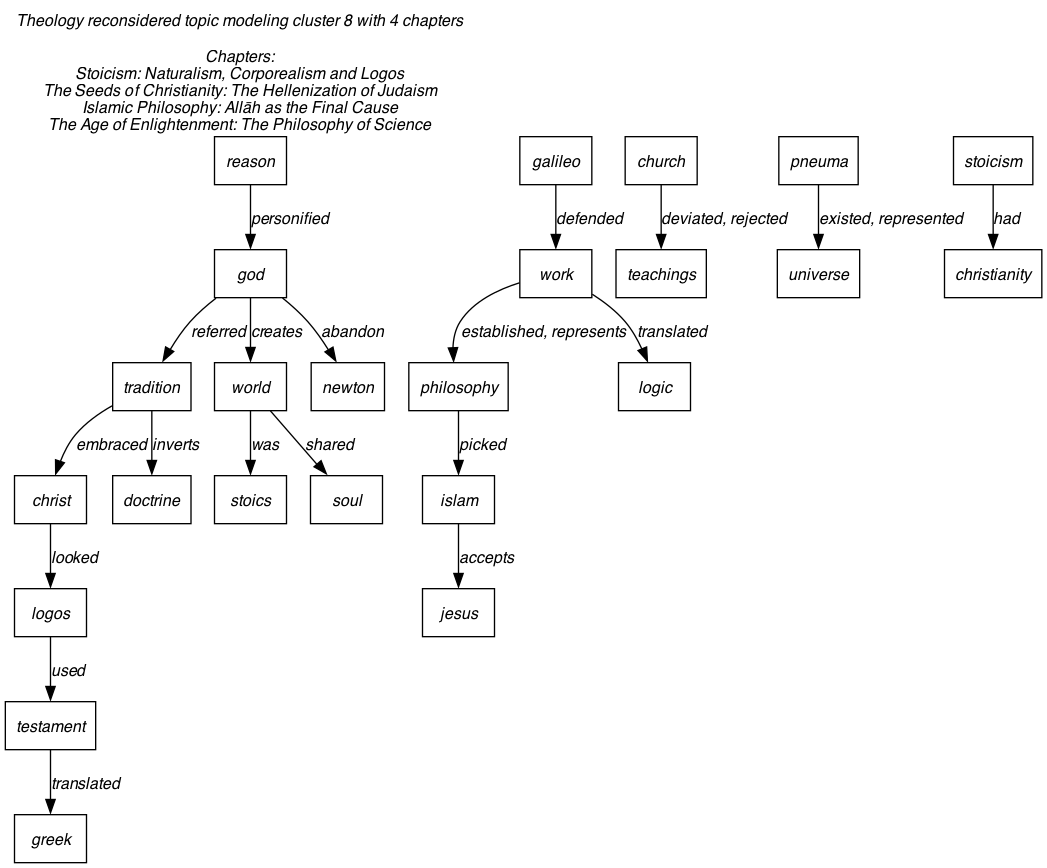

In [15]:
use_key_terms = True

# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS + 1):
    # print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chapter_titles = [titles[i] for i in chosen_chapters]
    # print("Chosen chapters \n")
    # for title in chapter_titles:
    #     print(title)

    # Specify the number of top words to use.
    n = max(50, len(chosen_chapters) * 5)

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    if use_key_terms:
        current_level_words = current_level_words = filter_topic_modeling_key_terms(
            key_terms=key_terms_per_cluster[cluster],
            tf_idf_word_types=tf_idf_pre_filtering,
            verbose=True,
        )
    else:
        current_level_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for chapter_idx in chosen_chapters:
        all_verses.extend(sentences_per_chapter[chapter_idx])
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=current_level_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
        title="Theology reconsidered topic modeling cluster "
        + str(cluster)
        + " with "
        + str(len(chosen_chapters))
        + " chapters",
        topic_modelling_chapters=chapter_titles,
    )